In [1]:
from misc import load, load_class_labels

dataset_root = "../dataset/"

train_dir = dataset_root + "train_set/"
val_dir = dataset_root + "val_set/"
val_degraded_dir = dataset_root + "val_set_degraded/"

sample_rate = 1
train_info = load(dataset_root + 'labels/train_info_cleaned.csv', 1, sample_rate)
test_info = load(dataset_root + 'labels/test.csv')
val_info = load(dataset_root + 'labels/validation.csv')

train_image_names = train_info.iloc[:, 0].values
val_image_names = val_info.iloc[:, 0].values
test_image_names = test_info.iloc[:, 0].values

train_labels = train_info.iloc[:, 1].values
val_labels = val_info.iloc[:, 1].values
test_labels = test_info.iloc[:, 1].values

class_labels = load_class_labels(dataset_root + 'classes.txt')

In [3]:
from cnn_classification import build_finetune_network, train_network
from tensorflow import keras
from keras.applications.efficientnet_v2 import EfficientNetV2B0, preprocess_input

save_path = "./models/efficientnet_v2_standard"

2024-01-01 20:29:40.121230: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 20:29:40.121289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 20:29:40.176394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 20:29:40.288584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 20:29:41.357989: W tensorflow/compiler/tf2

In [2]:
extension = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(251, activation='softmax')])

loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

cut_layer = 'top_dropout'
non_trainable_cut_layer = 'block5e_add'

extended_model = build_finetune_network(EfficientNetV2B0, extension, cut_layer,
                                        optimizer, metrics, loss, non_trainable_cut_layer=non_trainable_cut_layer)



train_loss, train_accuracy, val_loss, val_accuracy = train_network(extended_model,
                                                                   save_path,
                                                                   train_info,
                                                                   val_info,
                                                                   train_dir,
                                                                   epochs=10,
                                                                   augment=True,
                                                                   strong_augment=False,
                                                                   batch_size=64,
                                                                   preprocess_input=preprocess_input)

2024-01-01 16:34:35.187008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 16:34:35.187049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 16:34:35.197166: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 16:34:35.257544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 16:34:36.247430: W tensorflow/compiler/tf2

Epoch 1/10 iteration 1158/1159 Loss:     3.4854 Accuracy:     0.3158

2024-01-01 16:46:32.097633: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 1/10 iteration 1159/1159 Loss:     3.4850 Accuracy:     0.3158 Validation Loss:     3.8127, Validation accuracy:     0.3603
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 16:50:06.311156: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 2/10 iteration 1158/1159 Loss:     2.8060 Accuracy:     0.4484

2024-01-01 17:01:37.206434: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 2/10 iteration 1159/1159 Loss:     2.8061 Accuracy:     0.4485 Validation Loss:     3.7460, Validation accuracy:     0.3982
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 17:04:55.801418: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 3/10 iteration 1158/1159 Loss:     2.5264 Accuracy:     0.5000

2024-01-01 17:16:22.212718: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 3/10 iteration 1159/1159 Loss:     2.5264 Accuracy:     0.5000 Validation Loss:     3.6449, Validation accuracy:     0.4070
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 17:19:39.896784: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 4/10 iteration 1158/1159 Loss:     2.2971 Accuracy:     0.5379

2024-01-01 17:31:10.115467: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 4/10 iteration 1159/1159 Loss:     2.2970 Accuracy:     0.5379 Validation Loss:     3.7480, Validation accuracy:     0.4156
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 17:34:42.474730: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 5/10 iteration 1158/1159 Loss:     2.0981 Accuracy:     0.5702

2024-01-01 17:46:13.850132: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 5/10 iteration 1159/1159 Loss:     2.0979 Accuracy:     0.5703 Validation Loss:     3.7902, Validation accuracy:     0.4108
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 17:49:57.614193: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 6/10 iteration 1158/1159 Loss:     1.9154 Accuracy:     0.5984

2024-01-01 18:01:20.702045: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 6/10 iteration 1159/1159 Loss:     1.9154 Accuracy:     0.5985 Validation Loss:     3.8721, Validation accuracy:     0.4165
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 18:04:48.276260: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 7/10 iteration 1158/1159 Loss:     1.7352 Accuracy:     0.6268

2024-01-01 18:16:16.420269: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 7/10 iteration 1159/1159 Loss:     1.7354 Accuracy:     0.6267 Validation Loss:     3.9731, Validation accuracy:     0.4088
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 18:20:04.243154: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 8/10 iteration 1158/1159 Loss:     1.5754 Accuracy:     0.6524

2024-01-01 18:31:22.345271: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 8/10 iteration 1159/1159 Loss:     1.5756 Accuracy:     0.6524 Validation Loss:     4.2307, Validation accuracy:     0.4052
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 18:34:57.218520: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 9/10 iteration 1158/1159 Loss:     1.4256 Accuracy:     0.6749

2024-01-01 18:46:12.375526: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 9/10 iteration 1159/1159 Loss:     1.4257 Accuracy:     0.6749 Validation Loss:     4.2282, Validation accuracy:     0.4052
INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets


INFO:tensorflow:Assets written to: ./models/efficientnet_v2_standard/assets
2024-01-01 18:50:05.640384: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 10/10 iteration 1158/1159 Loss:     1.2884 Accuracy:     0.6955

2024-01-01 19:01:30.731461: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/model/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 10/10 iteration 1159/1159 Loss:     1.2884 Accuracy:     0.6955 Validation Loss:     4.4386, Validation accuracy:     0.3957


In [24]:
from tensorflow import keras
from cnn_classification import evaluate_model, predict

model = keras.models.load_model(save_path)
predictions, names = predict(model, val_degraded_dir, 64, preprocess_input=preprocess_input)

1/1 [==============================] - 1s 1s/step


[142 104 214 ...  62 189  78]


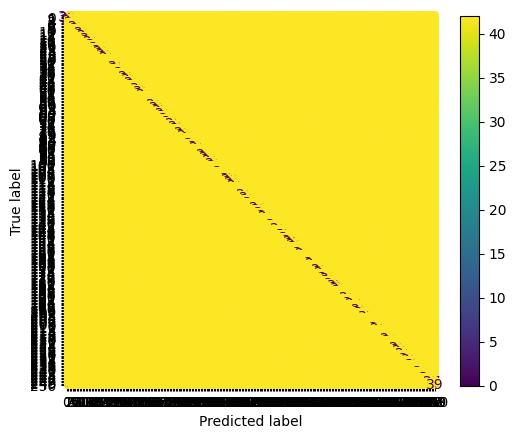

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

ordered_indices = np.argsort(names)
predictions = np.array(predictions)
ordered_names = np.argsort(test_image_names)

predictions = np.argmax(predictions[ordered_indices], axis=1)
ordered_y = test_labels[ordered_names]


cm = confusion_matrix(ordered_y, predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [26]:
cm.diagonal().sum() / cm.sum()

0.41128897782224444

In [27]:
from sklearn.metrics import classification_report

print(classification_report(ordered_y, predictions, target_names=class_labels))

                               precision    recall  f1-score   support

                      macaron       0.89      0.56      0.69        55
                      beignet       0.66      0.62      0.64        61
                      cruller       0.29      0.53      0.37        53
                  cockle_food       0.40      0.51      0.45        51
                       samosa       0.57      0.61      0.59        41
                     tiramisu       0.59      0.37      0.45        52
                      tostada       0.54      0.35      0.43        57
                     moussaka       0.44      0.39      0.41        54
                     dumpling       0.34      0.49      0.40        49
                      sashimi       0.55      0.39      0.46        46
                        knish       0.36      0.42      0.39        48
                    croquette       0.34      0.49      0.40        47
                     couscous       0.33      0.47      0.39        45
     